In [3]:
import pandas as pd

sensor_data = "../all respondents data/003_91dc3428-46c3-4d80-865c-e6e853abf00f.csv"
cognitive_phase_data = "resp 3 cognitive tasks.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:16,Explore,Supporting material
1,0:01:00,Explore,Supporting material
2,0:01:44,Explore,Supporting material
3,0:02:46,Explore,"Map, Filter, supporting material"
4,0:03:02,Explore,Map (performance)


In [4]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


     Time Started Cognitive Task                           Screens
0         16000.0        Explore               Supporting material
1         60000.0        Explore               Supporting material
2        104000.0        Explore               Supporting material
3        166000.0        Explore  Map, Filter, supporting material
4        182000.0        Explore                 Map (performance)
..            ...            ...                               ...
105     2340000.0        Explore                   Map, statistics
106     2346000.0       Conclude                               Map
107     2360000.0       Conclude          Supporting material, map
108     2380000.0       Conclude                            Filter
109     2430000.0       Conclude                               NaN

[110 rows x 3 columns]
float64


In [5]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36522.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explore,Supporting material
1,36540.0,0.124517,0.182482,0.023478,0.127476,0.027181,0.125768,0.056677,0.328766,0.0,0.290252,0.007409,Explore,Supporting material
2,36540.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explore,Supporting material
3,36591.0,0.124995,0.184449,0.023551,0.126825,0.026971,0.126182,0.056253,0.328766,0.0,0.382996,0.016253,Explore,Supporting material
4,36626.0,0.125877,0.187244,0.023729,0.127308,0.026426,0.126763,0.056174,0.328766,0.0,0.414892,0.017531,Explore,Supporting material


In [6]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])

# Check if a categorical value exists in the DataFrame
if final_df['Cognitive Task'].isin(['Explore']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

final_df.to_csv('003-91dc3428_emotions_with_cognitive_task_and_screen.csv', index=False)
final_df.tail()

The categorical value exists in the DataFrame


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
146171,2477397.0,0.159918,0.199071,0.036735,0.199124,0.024523,0.121992,0.072197,0.328766,0.0,0.269123,0.008675,Conclude,NaN
146173,2477428.0,0.152546,0.203217,0.033635,0.181088,0.024471,0.124029,0.068194,0.328766,0.0,0.226632,0.009204,Conclude,NaN
146175,2477460.0,0.145856,0.203593,0.031161,0.169411,0.024488,0.125848,0.066089,0.328766,0.0,0.226944,0.009375,Conclude,NaN
146177,2477491.0,0.140343,0.205834,0.029277,0.161164,0.024488,0.126543,0.064886,0.328766,0.0,0.210516,0.009474,Conclude,NaN
146178,2477523.0,0.135568,0.210283,0.027627,0.153636,0.024495,0.127775,0.063522,0.328766,0.0,0.200138,0.009230,Conclude,NaN


In [7]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
76598,1315892.0,0.300648,25.570250,0.041192,0.182434,0.025242,0.135639,1.416200,0.983289,0.0,0.647832,0.628392,Test Hypothesis,Map
101074,1723958.0,1.499453,0.205987,0.588642,1.189639,0.024527,0.126309,0.139797,57.975433,0.0,0.080860,0.101007,Assess Results,Statistics
63291,1093849.0,0.185881,0.191941,0.041066,0.180429,0.024331,0.128508,0.076917,0.328766,0.0,0.076687,0.017772,Test Hypothesis,Filter
119335,2028868.0,1.109648,0.188819,0.539248,0.852516,0.024623,0.128131,0.650484,51.966286,0.0,0.030854,0.030854,Assess Results,Map
1725,65389.0,0.131831,0.185867,0.025417,0.132285,0.026080,0.129362,0.057269,0.328766,0.0,0.488160,0.065635,Explore,Supporting material
32431,577819.0,0.126664,0.173402,0.024497,0.169560,0.024377,0.126776,0.076829,0.328766,0.0,0.170079,0.007589,Set Goal,Statistics
2425,77056.0,0.129144,0.187213,0.024657,0.129990,0.026291,0.128456,0.058139,0.328766,0.0,0.545217,0.020009,Explore,Supporting material
62401,1079017.0,0.152689,0.262235,0.030895,0.147665,0.027468,0.129426,0.062401,0.328766,0.0,0.246270,0.128228,Test Hypothesis,Filter
112291,1911317.0,1.308780,0.235292,0.655631,0.942041,0.024876,0.124865,1.884669,63.286991,0.0,0.008794,0.046622,Test Hypothesis,Filter
63103,1090715.0,0.372623,0.191813,0.104283,0.330333,0.024315,0.128411,0.252989,1.937093,0.0,0.058061,0.035405,Test Hypothesis,Filter


In [8]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,7.311900e+04,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000
mean,1.257174e+06,2.012766,0.558066,0.342764,2.636521,1.087325,0.135048,3.317782,35.567201,1.156507,0.339462,0.134676
std,7.045893e+05,4.519206,3.920136,0.555571,6.807691,10.005670,0.249280,9.813093,34.816160,10.095268,0.868025,0.732617
min,3.654000e+04,0.003705,0.000021,0.006188,0.041279,0.024042,0.005518,0.055338,0.328766,-45.083767,0.000320,0.000166
25%,6.467795e+05,0.168212,0.170994,0.026189,0.180939,0.024327,0.121300,0.080309,0.328766,0.000000,0.027586,0.011523
50%,1.257611e+06,0.998678,0.186814,0.238133,0.947007,0.024843,0.126304,0.311725,28.883924,0.000000,0.081228,0.030473
75%,1.867240e+06,1.438978,0.193553,0.648991,1.547494,0.026452,0.128724,2.570031,67.226921,0.000000,0.276837,0.081493
max,2.477523e+06,93.730980,91.378159,63.556683,99.461021,99.979492,10.356455,99.971573,99.981049,99.871223,42.219398,44.869358


In [9]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0       Assess Results  1.136012  0.187128  0.412329  0.978419  0.024819   
1             Conclude  0.931860  0.186849  0.165526  0.942178  0.024566   
2              Explore  0.832270  0.184943  0.148066  0.882541  0.025362   
3                Focus  1.059924  0.185421  0.501715  0.963259  0.025023   
4  Generate Hypothesis  1.268038  0.184735  0.636721  1.088460  0.024654   
5             Set Goal  0.332365  0.191745  0.036244  0.348260  0.024906   
6      Test Hypothesis  1.009588  0.188708  0.198382  0.942887  0.024534   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.125970  0.440505   41.635345        0.075376   0.038607  
1  0.126442  0.269486   10.376647        0.068042   0.027718  
2  0.125959  0.254757   23.079073        0.107916   0.025861  
3  0.125985  0.190724   54.991669        0.048214   0.020014  
4  0.126041  1.110411   64.516083        0.050751   0.032448  
5  0.127618  

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Assess Results,1.136012,0.187128,0.412329,0.978419,0.024819,0.125970,0.440505,41.635345,0.075376,0.038607
1,Conclude,0.931860,0.186849,0.165526,0.942178,0.024566,0.126442,0.269486,10.376647,0.068042,0.027718
2,Explore,0.832270,0.184943,0.148066,0.882541,0.025362,0.125959,0.254757,23.079073,0.107916,0.025861
3,Focus,1.059924,0.185421,0.501715,0.963259,0.025023,0.125985,0.190724,54.991669,0.048214,0.020014
4,Generate Hypothesis,1.268038,0.184735,0.636721,1.088460,0.024654,0.126041,1.110411,64.516083,0.050751,0.032448


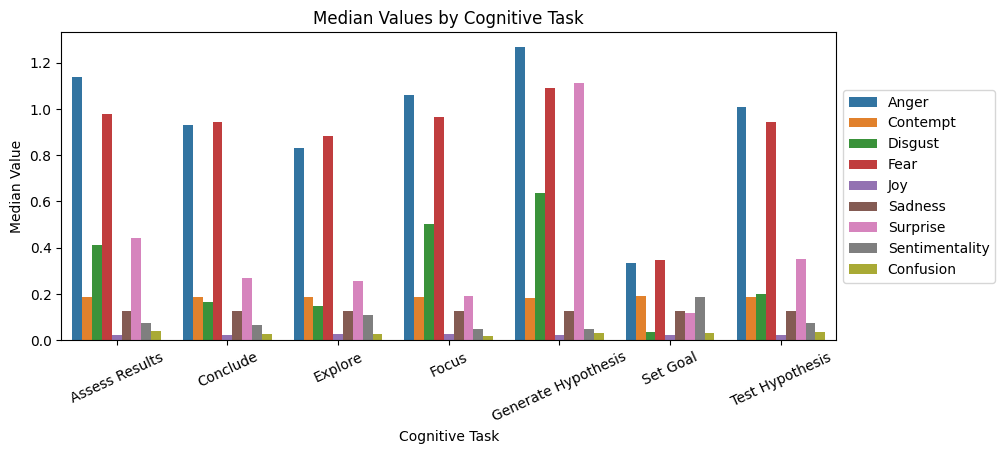

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

medians_to_plot = medians.drop(['Engagement', 'Cognitive Task Encoded'], axis=1)

# Melt the dataframe to convert emotions into a column
melted_df = medians_to_plot.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Median Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Median Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Respondent 3 (Low Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Median Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


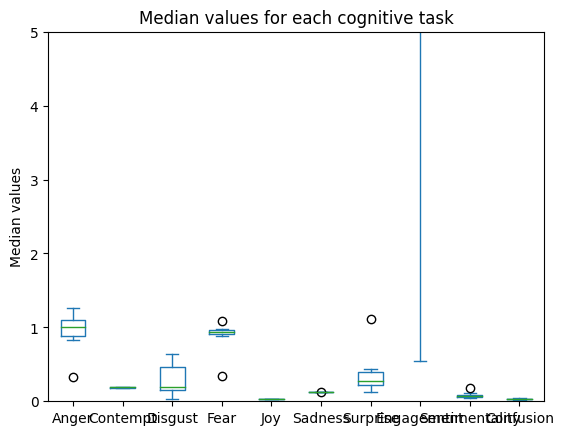

In [10]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [11]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


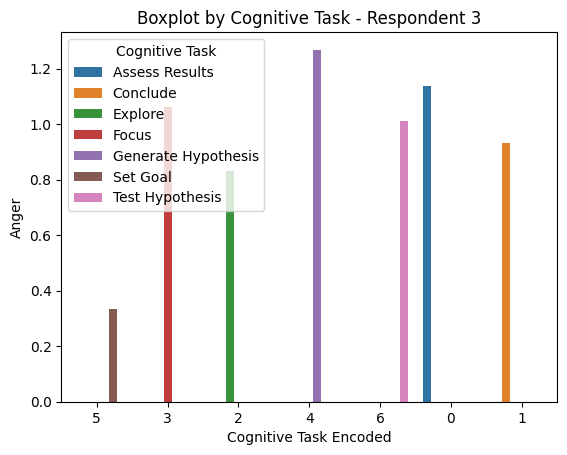

In [12]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Display the plot
plt.show()


In [13]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger              0.998678
Contempt           0.186814
Disgust            0.238133
Fear               0.947007
Joy                0.024843
Sadness            0.126304
Surprise           0.311725
Engagement        28.883924
Sentimentality     0.081228
Confusion          0.030473
dtype: float64

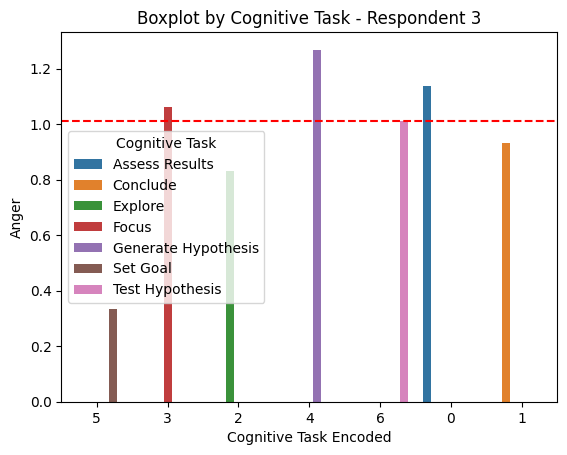

In [14]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Get the original string labels from the LabelEncoder
le = LabelEncoder()
le.fit(medians['Cognitive Task'])
labels = le.inverse_transform([5,3,2,4,6,0,1])  


# Display the plot
plt.show()


Wrong Lables below!!!

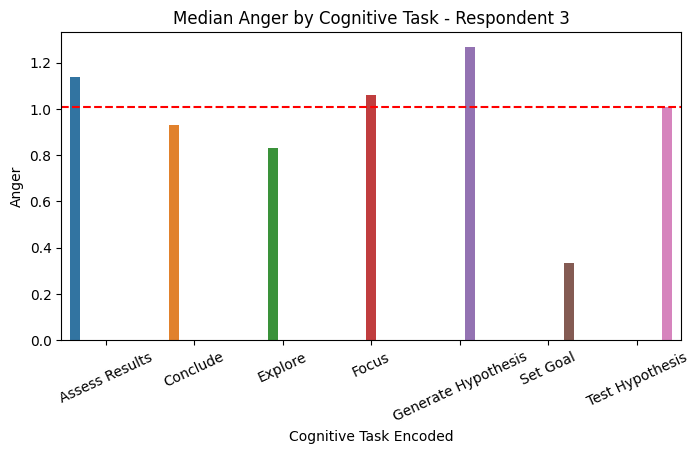

In [22]:
import matplotlib.pyplot as plt

# Define a dictionary to map encoded labels to their corresponding original labels
label_map = {0: 'Assess Results', 1: 'Conclude', 2: 'Explore', 3: 'Focus', 4: 'Generate Hypothesis', 5: 'Set Goal', 6: 'Test Hypothesis'}

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(8,4))

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

# Add the title
plt.title("Median Anger by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Define the desired order of the labels as a list
ordered_labels = [label_map[i] for i in [0,1,2,3,4,5,6]] # [5,3,2,4,6,0,1]]

# Set the x-axis tick labels using the ordered_labels list
plt.xticks(range(len(label_map)), ordered_labels, rotation=25, fontsize=10)

plt.legend().remove()
# Display the plot
plt.show()


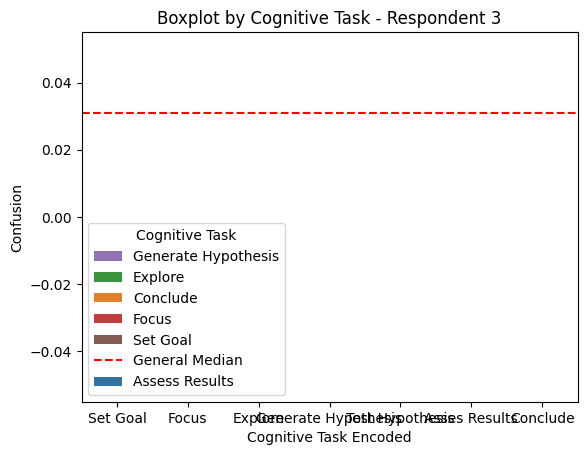

In [16]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=['Set Goal','Focus', 'Explore', 'Generate Hypothesis', 'Test Hypothesis', 'Asses Results', 'Conclude'])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Reorder the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,3,2,4,6,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Cognitive Task')

# Display the plot
plt.show()


Number of NaN values in 'Cognitive Task' column:  0


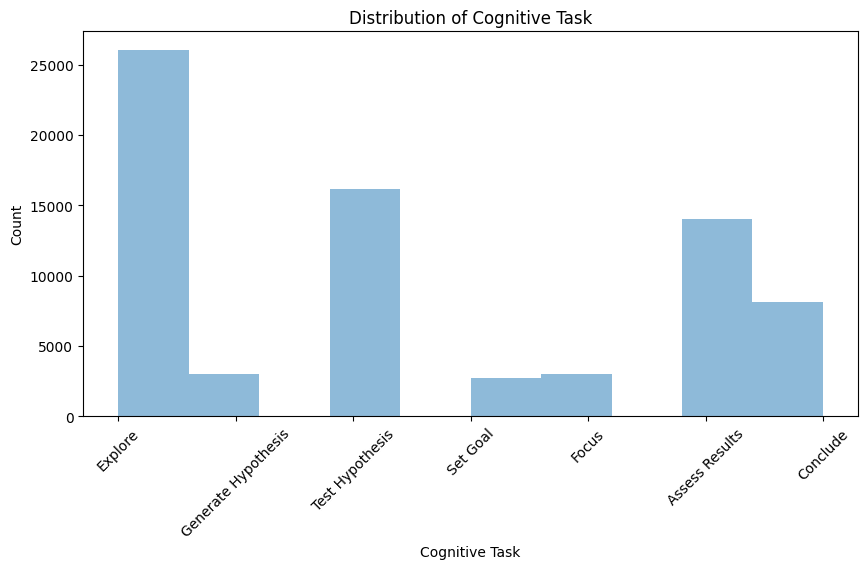

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

df_phases = pd.read_csv(cognitive_phase_data)

# Convert the Cognitive Task column to a string type
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].astype(str)

# Count the number of NaN values in the Cognitive Task column
nan_count = df_phases['Cognitive Task'].isna().sum()

# Print the result
print("Number of NaN values in 'Cognitive Task' column: ", nan_count)

# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(final_df['Cognitive Task'], alpha=0.5)

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
